In [1]:
print("Hello World")

Hello World


In [1]:
import os
notebook_path = os.path.abspath("IR_Project")

In [2]:
import pandas as pd

In [3]:
import json

with open(os.path.join(os.path.dirname(notebook_path)),"/software/objects_corpus1.json") as json_file:
    data = json.load(json_file)

# print(data)

article_texts = []
list_of_images = []

for k, v in data.items():
  article_texts.append(v)
  list_of_images.append(k)


print(article_texts)
print(list_of_images)


['', 'suitcase bicycle suitcase ', '', 'umbrella ', 'vase pottedplant ', 'banana ', 'umbrella umbrella ', 'umbrella ', 'pottedplant ', 'pottedplant ', 'horse ', 'horse ', 'bear ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse ', 'horse person ', 'horse ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird ', 'bird bird ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'aeroplane ', 'heart cake ', 'heart cake ', 'heart ', 'heart cake ', 'heart umbrella ', 'heart cat ', 'heart cake vase ', 'heart diningtable ', 'heart cake ', 'heart handbag ', 'heart bird ', 'heart ', 'moon diningtable ', 'moon ', 'moon ', 'moon apple cake ', 'moon apple ', 'moon diningtable apple ', 'moon vase apple ', 'moon clock boat boat boat ', 'moon ', 'moon apple ', 'boat boat boat boat boat person pe

In [4]:
with open(os.path.join(os.path.dirname(notebook_path)),"/software/objects_area_corpus1.json") as json_file:
    data = json.load(json_file)

file_to_obj_area = data


# for k, v in data.items():
  # article_texts.append(v)
  # list_of_images.append(k)


print(file_to_obj_area)

{'/content/drive/MyDrive/IR/Flickr15K/images/butterfly/765562.jpg': {}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/980618.jpg': {'suitcase': 0.6880976619692533, 'bicycle': 0.6880976619692533}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/34870.jpg': {}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/970246.jpg': {'umbrella': 0.49907779693603516}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/729473.jpg': {'vase': 0.7922983417811518, 'pottedplant': 0.8671819453682255}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/74660.jpg': {'banana': 0.18403444931844548}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/770256.jpg': {'umbrella': 0.43231747889133626}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/34314.jpg': {'umbrella': 0.40077557702282157}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/34315.jpg': {'pottedplant': 0.6613232725155279}, '/content/drive/MyDrive/IR/Flickr15K/images/butterfly/759996.jpg': {'pottedplant': 0.70

## Text preprocessing in the corpus


#### Preprocessing steps are as follows,



1.   Convert to lowercase characters
2.   Remove special characters
1.   Remove numbers
2.   Remove punctuations and spaces
1.   Remove stopwords
2.   Perform stemming operation

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

In [7]:
def get_vocabulary_size():
  uniqueWords = set()
  for article in article_texts:
    for word in article.split():
      uniqueWords.add(word)
  return len(uniqueWords)

In [8]:
print("Vocabulary Size before preprocessing : " +  str(get_vocabulary_size()))

Vocabulary Size before preprocessing : 31


In [9]:
# converts to lowercase
def lower_case(text):
    return text.lower()

for i in range(len(article_texts)):
  article_texts[i] = lower_case(article_texts[i])

print("Vocabulary Size after converting text to lowercase : " +  str(get_vocabulary_size()))

Vocabulary Size after converting text to lowercase : 31


In [10]:
# removes non alphanumeric chars
def remove_non_alphanumeric(text):
    res = ""
    for elem in text:
      if elem.isalnum() or elem == " ":
        res += elem
    return res

for i in range(len(article_texts)):
  article_texts[i] = remove_non_alphanumeric(article_texts[i])

print("Vocabulary Size after removing non alphanumeric chars : " +  str(get_vocabulary_size()))

Vocabulary Size after removing non alphanumeric chars : 31


In [11]:
# removes numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

for i in range(len(article_texts)):
  article_texts[i] = remove_numbers(article_texts[i])

print("Vocabulary Size after removing numbers : " +  str(get_vocabulary_size()))

Vocabulary Size after removing numbers : 31


In [12]:
# remove punctuation
def remove_punctuation_marks(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

for i in range(len(article_texts)):
  article_texts[i] = remove_punctuation_marks(article_texts[i])

print("Vocabulary Size after removing punctutaion : " +  str(get_vocabulary_size()))

Vocabulary Size after removing punctutaion : 31


In [13]:
# removes extra white space
def remove_white_space(text):
    return  " ".join(text.split())

for i in range(len(article_texts)):
  article_texts[i] = remove_white_space(article_texts[i])

print("Vocabulary Size after removing extra white space : " +  str(get_vocabulary_size()))

Vocabulary Size after removing extra white space : 31


In [14]:
# remove stopwords 
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

for i in range(len(article_texts)):
  article_texts[i] = remove_stopwords(article_texts[i])

vocab = set()
for x in article_texts:
  for word in x:
    vocab.add(word) 

print("Vocabulary Size after removing stop words : " +  str(len(vocab)))

Vocabulary Size after removing stop words : 31


# Generating Term Weights as per standard TF-IDF

In [15]:
def df_calculator(text,N) :
  DF = {}
  for i in range(N):
      tokens = text[i]
      for w in tokens:
          try:
              DF[w].add(i)
          except:
              DF[w] = {i}
  for i in DF:
      DF[i] = len(DF[i])
  return DF

In [16]:
DF_docs = df_calculator(article_texts,len(article_texts))

In [17]:
len(DF_docs)

31

In [18]:
DF_docs

{'suitcase': 1,
 'bicycle': 1,
 'umbrella': 7,
 'vase': 3,
 'pottedplant': 3,
 'banana': 1,
 'horse': 20,
 'bear': 1,
 'person': 27,
 'bird': 18,
 'aeroplane': 10,
 'heart': 12,
 'cake': 6,
 'cat': 1,
 'diningtable': 4,
 'handbag': 1,
 'moon': 10,
 'apple': 5,
 'clock': 1,
 'boat': 21,
 'chair': 2,
 'backpack': 1,
 'dog': 1,
 'tree': 10,
 'bench': 2,
 'car': 1,
 'sun': 20,
 'kite': 1,
 'elephant': 1,
 'knife': 2,
 'scissors': 1}

In [19]:
def doc_freq(word):
    c = 0
    try:
        c = DF_docs[word]
    except:
        pass
    return c

In [20]:
from collections import Counter
import numpy as np
def weights_calculator(files,text,N) :

  doc = 0

  tf_idf = {}

  for i in range(N):
      
      tokens = text[i]
      counter = Counter(tokens)

      filename = list_of_images[doc]
      obj_areas_for_file_dict = file_to_obj_area[filename]
       
      for token in np.unique(tokens):

          if token in obj_areas_for_file_dict:
            tf = obj_areas_for_file_dict[token]
          else:
            tf = 0.01


          df = doc_freq(token)
          if df==0:
            df = 1
          idf = np.log2((len(files))/(df))
          
          tf_idf[doc, token] = tf*idf

      doc += 1

  return tf_idf

In [21]:
tf_idf_docs = weights_calculator(article_texts,article_texts,len(article_texts))

In [22]:
tf_idf_docs

{(1, 'bicycle'): 4.839681922998687,
 (1, 'suitcase'): 4.839681922998687,
 (3, 'umbrella'): 2.109136746808503,
 (4, 'pottedplant'): 4.72480657635981,
 (4, 'vase'): 4.316806220056853,
 (5, 'banana'): 1.2943921289116325,
 (6, 'umbrella'): 1.8270030977438785,
 (7, 'umbrella'): 1.6937048730912627,
 (8, 'pottedplant'): 3.6031937285714237,
 (9, 'pottedplant'): 3.832363293804938,
 (10, 'horse'): 1.4680621601642028,
 (11, 'horse'): 1.566286603537244,
 (12, 'bear'): 3.273691500923331,
 (13, 'horse'): 1.973761356943154,
 (14, 'horse'): 2.3170546495006037,
 (15, 'horse'): 1.9184608053948708,
 (16, 'horse'): 1.6501953461331569,
 (17, 'horse'): 0.6168543610110219,
 (18, 'horse'): 0.9928517553587123,
 (19, 'horse'): 1.798024754049076,
 (20, 'horse'): 1.0927114434314433,
 (21, 'horse'): 0.6342272313364864,
 (22, 'horse'): 1.3640729015534703,
 (23, 'horse'): 1.148449917728374,
 (24, 'horse'): 1.4157417521263804,
 (25, 'horse'): 1.144366846895192,
 (26, 'horse'): 2.4692838608226437,
 (27, 'horse'): 0.54

# Vector Space Model

In [23]:
def get_vectors(text,weights) :
  vector_model = {}
  for i in range(len(text)) :
    vector = []
    for term in vocab : 
      if term in text[i] :
        vector.append(weights[(i,term)])
      else :
        vector.append(0)
    vector_model[i] = vector
  return vector_model  

In [24]:
standard_tf_idf_vsm = get_vectors(article_texts,tf_idf_docs)

In [25]:
standard_tf_idf_vsm

{0: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 1: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  4.839681922998687,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4.839681922998687,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 2: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 3: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2.109136746808503,
  0,
  0,
  0,
  0],
 4: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4.72480657635981,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4.316806220056853,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 5: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1.2943921289116325,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [26]:
std_vsm_df = pd.DataFrame.from_dict(standard_tf_idf_vsm, orient ='index') 
std_vsm_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.839682,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,2.109137,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,4.316806,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,3.087294,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
127,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
128,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,4.728123,...,3.315699,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
129,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Generating ranked list for given queries 

Queries

In [27]:
q1 = "boat"
# q2 = "sun"

In [28]:
q1 = lower_case(q1)
q1 = remove_non_alphanumeric(q1)
q1 = remove_numbers(q1)
q1 = remove_punctuation_marks(q1)
q1 = remove_white_space(q1)
q1 = remove_stopwords(q1)
q1

['boat']

Similarity Measure 

In [30]:
import operator
import math

def cosine_similarity(vector_q,vector_d) :
  num = 0
  den1 = 0
  den2 = 0
  for i in range(len(vocab)) :
    num = num + vector_q[i] * vector_d[i]
    den1 = den1 + math.pow((vector_q[i]),2)
    den2 = den2 + math.pow((vector_d[i]),2)
  deno = math.sqrt((den1 * den2))

  ans = num/deno
  return ans

In [31]:
def similarity_ranking_list(vector_q,doc_vectors) :
  ranking_list = {}
  for i in range(len(doc_vectors)) :
    ranking_list[i] = cosine_similarity(vector_q[0],doc_vectors[i])

  sorted_ranking_list = dict(sorted(ranking_list.items(), key=operator.itemgetter(1),reverse=True))

  return sorted_ranking_list

#### Cosine Similarity based ranking list using standard TF-IDF weighting

In [32]:
tf_idf_q1 = weights_calculator(article_texts,[q1],1)
std_tf_idf_q1_vector = get_vectors([q1],tf_idf_q1)

In [33]:
len(std_tf_idf_q1_vector)

1

In [34]:
std_tf_idf_q1_vector

{0: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0264110557875869,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [35]:
std_ranking_list_q1 = similarity_ranking_list(std_tf_idf_q1_vector,standard_tf_idf_vsm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [66]:
import math

for k in std_ranking_list_q1.copy():
  v = std_ranking_list_q1[k]
  if math.isnan(v) == True:
    std_ranking_list_q1.pop(k)
  if v == 0.0:
    std_ranking_list_q1.pop(k)

std_ranking_list_q1

{86: 1.0,
 88: 0.9999998775527236,
 84: 0.9999989678287036,
 74: 0.9999977629680175,
 83: 0.9999917397232218,
 91: 0.9999905078169784,
 89: 0.9999872444912916,
 79: 0.9999683895987531,
 85: 0.9999546996017027,
 78: 0.9998937380973483,
 81: 0.9998599269703043,
 90: 0.9996947651473918,
 76: 0.9987031016813201,
 92: 0.9981170927547944,
 82: 0.9908518835452311,
 80: 0.7533262937444976,
 73: 0.6074471470067984,
 87: 0.4972926571103209,
 77: 0.06302537747168033,
 122: 0.036388208239319646,
 70: 0.00015695517975334005}

In [67]:
text_retrieval_ranking_list = []

for k in std_ranking_list_q1.keys():
  text_retrieval_ranking_list.append(list_of_images[k])

text_retrieval_ranking_list  

['/content/drive/MyDrive/IR/Flickr15K/images/sailling/910479.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/78810.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/779006.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/956241.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/778552.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/916842.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/848713.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/935844.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/910608.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/989694.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/977931.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/785626.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/99614.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/972704.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg

In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img 

In [48]:
from PIL import Image

images_list = []

for k in std_ranking_list_q1.keys():
  # print("Image index : ", k, " Ranking score : ", std_ranking_list_q1[k])
  # im = Image.open(list_of_images[k])
  images_list.append(list_of_images[k])

print(images_list)

['/content/drive/MyDrive/IR/Flickr15K/images/sailling/910479.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/78810.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/779006.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/956241.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/778552.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/916842.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/848713.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/935844.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/910608.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/989694.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/977931.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/785626.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/99614.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/972704.jpg', '/content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg', '/content/d

In [68]:
plt.figure(figsize = (40,40));

for index, file in enumerate(images_list[:40]):
  plt.subplot(5,8,index+1);
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [50]:
import pickle
file=open(os.path.join(os.path.dirname(notebook_path)),"/software/Inception.pkl','rb')
ranking_inception=pickle.load(file)
file.close()


In [51]:
ranking_inception['4/7'][:100]

[['big_ben/969994', array([[0.6066441]], dtype=float32)],
 ['fire_balloon/917249', array([[0.5901197]], dtype=float32)],
 ['fire_balloon/947521', array([[0.5833498]], dtype=float32)],
 ['bird/546793', array([[0.57945824]], dtype=float32)],
 ['London_eye/382713', array([[0.56893706]], dtype=float32)],
 ['fire_balloon/917248', array([[0.56645]], dtype=float32)],
 ['Burj_Al_Arab/330598', array([[0.56469786]], dtype=float32)],
 ['sailling/62872', array([[0.5515413]], dtype=float32)],
 ['sailling/916610', array([[0.5511373]], dtype=float32)],
 ['airplane/332200', array([[0.5510876]], dtype=float32)],
 ['big_ben/990516', array([[0.5508395]], dtype=float32)],
 ['big_ben/636187', array([[0.55048215]], dtype=float32)],
 ['sailling/662752', array([[0.54906565]], dtype=float32)],
 ['heart_shape/422591', array([[0.54889464]], dtype=float32)],
 ['London_eye/713501', array([[0.544928]], dtype=float32)],
 ['big_ben/571651', array([[0.5443671]], dtype=float32)],
 ['Sydney_Opera/957979', array([[0.5440

In [52]:
ranking_inception_with_filenames = []

for item in ranking_inception['4/7'][:100]:
  image_name = item[0]
  filename = os.path.join(os.path.dirname(notebook_path)),"/software/Flickr15K/images/" + image_name + ".jpg"
  ranking_inception_with_filenames.append(filename)

ranking_inception_with_filenames



['/content/drive/MyDrive/IR/Flickr15K/images/big_ben/969994.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/917249.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/947521.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/bird/546793.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/London_eye/382713.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/917248.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/Burj_Al_Arab/330598.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/62872.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/airplane/332200.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/990516.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/636187.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/662752.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/heart_shape/422591.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/Lond

In [53]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def subtract(li1,li2):
    temp3 = []
    for element in li1:
        if element not in li2:
            temp3.append(element)
    return temp3

def final_list(sketch_list,text_list):
    first = intersection(sketch_list,text_list)
    second = subtract(text_list,first)
    third = subtract(sketch_list,first)
    first.extend(second)
    first.extend(third)
    return first

In [69]:
merged_ranking_list_ts = final_list(ranking_inception_with_filenames, text_retrieval_ranking_list)
merged_ranking_list_ts
type(merged_ranking_list_ts[0])

str

ValueError: ignored

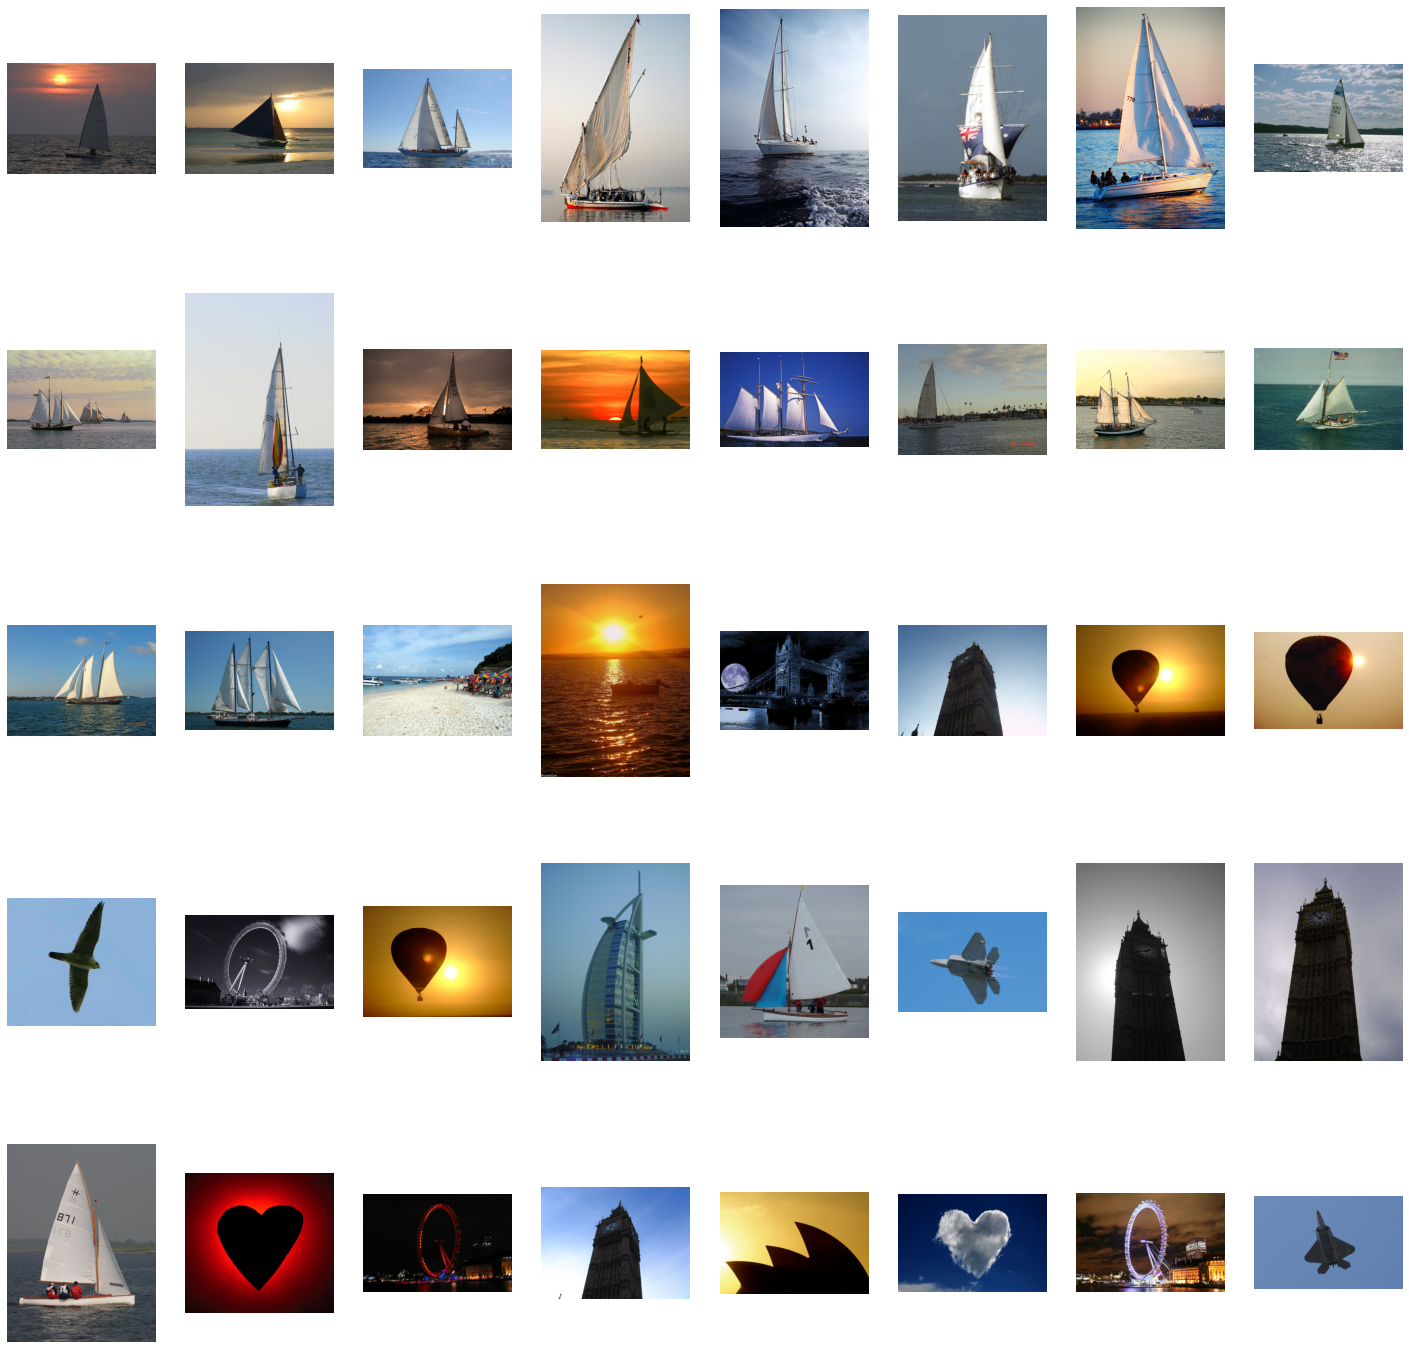

In [70]:
plt.figure(figsize = (25,25))

for index, file in enumerate(merged_ranking_list_ts[:50]):
  plt.subplot(5,8,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis('off')

In [64]:
merged_ranking_list_st = final_list(text_retrieval_ranking_list, ranking_inception_with_filenames)
merged_ranking_list_st

['/content/drive/MyDrive/IR/Flickr15K/images/sailling/916610.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/airplane/74785.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/969994.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/917249.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/947521.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/bird/546793.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/London_eye/382713.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/fire_balloon/917248.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/Burj_Al_Arab/330598.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/62872.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/airplane/332200.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/990516.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/big_ben/636187.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/sailling/662752.jpg',
 '/content/drive/MyDrive/IR/Flickr15K/images/heart_sh

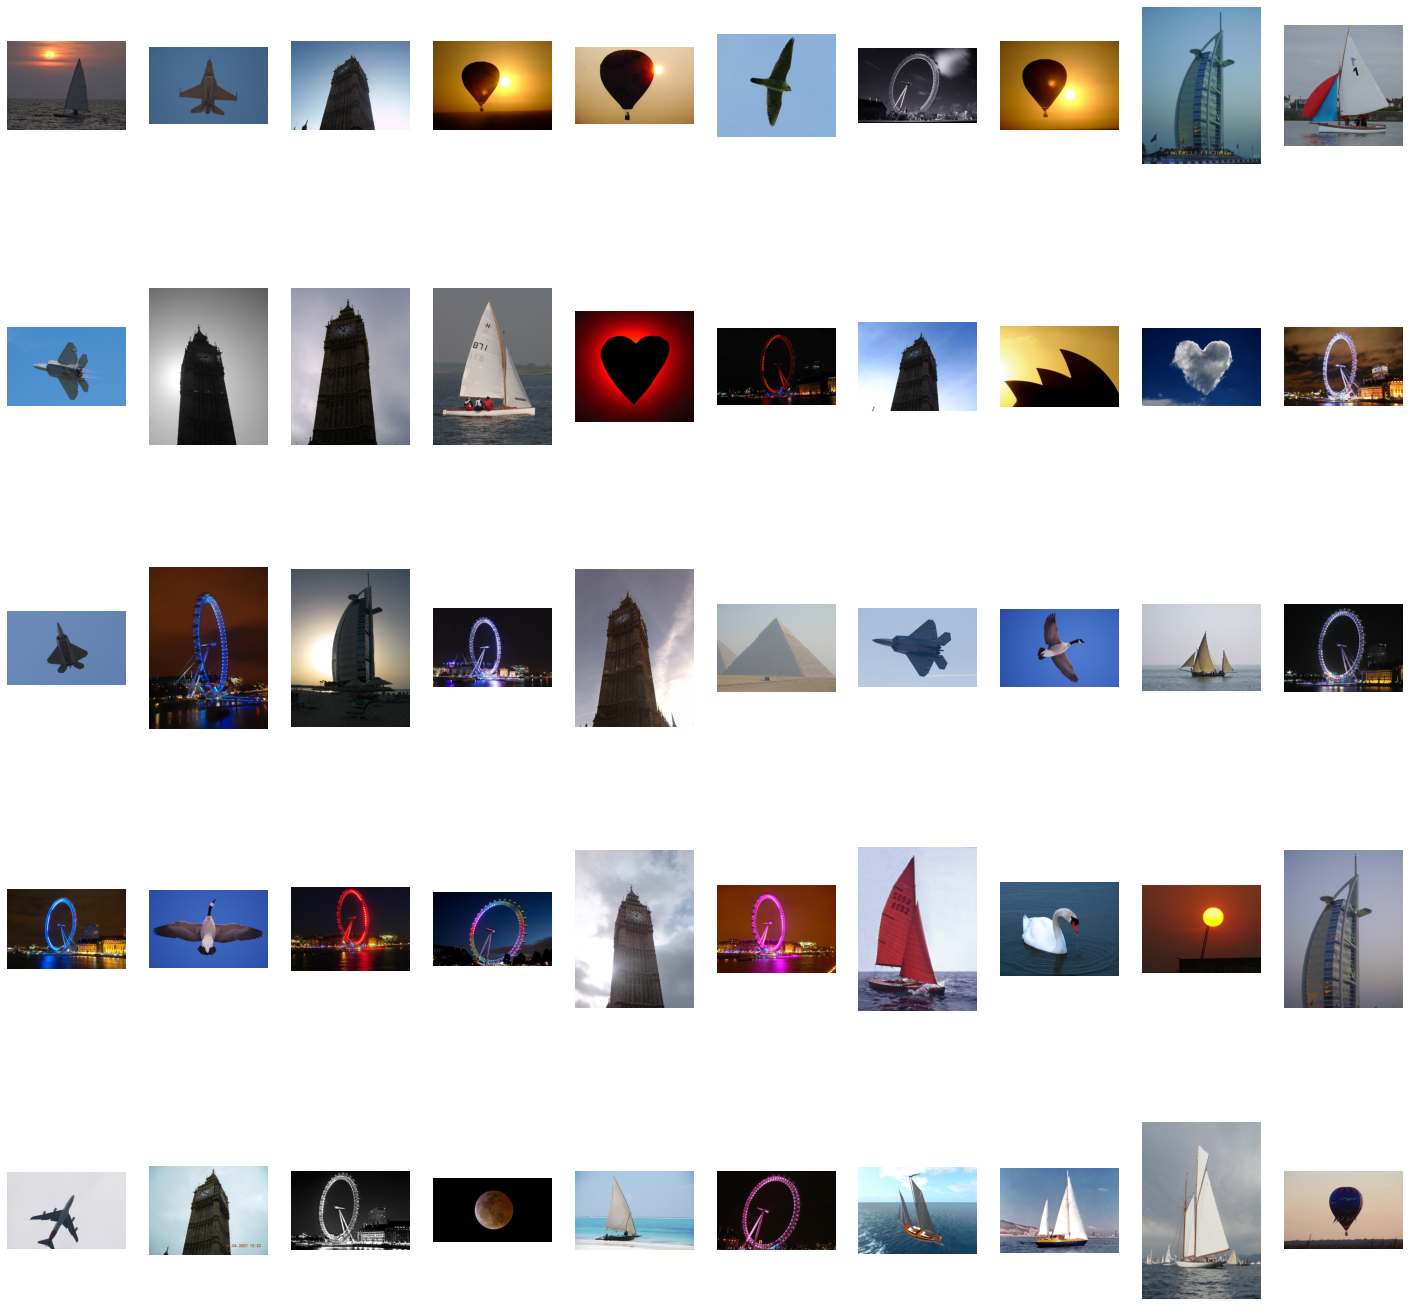

In [65]:
plt.figure(figsize = (25,25))

for index, file in enumerate(merged_ranking_list_st[:50]):
  plt.subplot(5,10,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis('off')